<a href="https://colab.research.google.com/github/seungkyoon/Projects/blob/master/Bong_Seungkyoon_ps3_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSET 3
*CPSC 453: Unsupervised Learning*

*Seungkyoon Bong*

In [1]:
from google.colab import drive, files
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/ColabNotebooks/
import sys
sys.path.append('/content/drive/MyDrive/ColabNotebooks/code')

Mounted at /content/drive/
/content/drive/MyDrive/ColabNotebooks


In [3]:
from ps3_functions import *
from vae import VAE
import torch
from torchvision import datasets, transforms
import numpy as np
import torchvision.utils
from matplotlib import pyplot as plt
import matplotlib.cm as cm

# !pip install phate
# !pip install scprep
import phate
import scprep

## 2 MNIST Classification

### 2.1 Downloading MNIST

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

mnist_train = datasets.MNIST(root = 'data', train=True, download=True, transform = transforms.ToTensor())
mnist_test = datasets.MNIST(root = 'data', train=False, download=True,transform = transforms.ToTensor())

batch_size = 128
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size, shuffle = True)

### 2.2 Logistic Regression

In [ ]:
model = LogisticRegression()
model = model.to(device)
SGD = torch.optim.SGD(model.parameters(), lr = 0.1)
loss_fn = torch.nn.CrossEntropyLoss()

train(model, loss_fn, SGD, train_loader, test_loader)
torch.save(model.state_dict(), '/content/drive/MyDrive/ColabNotebooks/log_reg.pt')

 EPOCH 10. Progress: 10.0%. 
 Train accuracy: 0.918233335018158. Test accuracy: 0.9202999472618103
 EPOCH 20. Progress: 20.0%. 
 Train accuracy: 0.92535001039505. Test accuracy: 0.9232999682426453
 EPOCH 30. Progress: 30.0%. 
 Train accuracy: 0.9279833436012268. Test accuracy: 0.9236999750137329
 EPOCH 40. Progress: 40.0%. 
 Train accuracy: 0.9288333654403687. Test accuracy: 0.9244999885559082
 EPOCH 50. Progress: 50.0%. 
 Train accuracy: 0.9300833344459534. Test accuracy: 0.9264000058174133
 EPOCH 60. Progress: 60.0%. 
 Train accuracy: 0.9306666851043701. Test accuracy: 0.9244999885559082
 EPOCH 70. Progress: 70.0%. 
 Train accuracy: 0.9312666654586792. Test accuracy: 0.925599992275238
 EPOCH 80. Progress: 80.0%. 
 Train accuracy: 0.9317666888237. Test accuracy: 0.926099956035614
 EPOCH 90. Progress: 90.0%. 
 Train accuracy: 0.9324666857719421. Test accuracy: 0.925599992275238
 EPOCH 100. Progress: 100.0%. 
 Train accuracy: 0.9331166744232178. Test accuracy: 0.9268999695777893


**Question 2.2.1:** *What percentage classification accuracy did your simple network achieve?*

**Answer:** After training for 100 epochs, my simple network achieved a test accuracy of ~92.7% (with a training accuracy of ~93.3%). This is quite impressive because the network is very simple with only a single layer of weights/biases connecting the inputs to outputs.


### 2.3 Feed-forward Neural Network

In [ ]:
# Without non-linearity
model = FeedForwardNet()
model = model.to(device)
SGD = torch.optim.SGD(model.parameters(), lr = 0.01)
loss_fn = torch.nn.CrossEntropyLoss()

train(model, loss_fn, SGD, train_loader, test_loader)
torch.save(model.state_dict(), '/content/drive/MyDrive/ColabNotebooks/ff_nonlinear.pt')

 EPOCH 10. Progress: 10.0%. 
 Train accuracy: 0.9136833548545837. Test accuracy: 0.9170999526977539
 EPOCH 20. Progress: 20.0%. 
 Train accuracy: 0.9216166734695435. Test accuracy: 0.9210999608039856
 EPOCH 30. Progress: 30.0%. 
 Train accuracy: 0.9241333603858948. Test accuracy: 0.9233999848365784
 EPOCH 40. Progress: 40.0%. 
 Train accuracy: 0.9265000224113464. Test accuracy: 0.9232999682426453
 EPOCH 50. Progress: 50.0%. 
 Train accuracy: 0.9276666641235352. Test accuracy: 0.9235999584197998
 EPOCH 60. Progress: 60.0%. 
 Train accuracy: 0.9292833209037781. Test accuracy: 0.9250999689102173
 EPOCH 70. Progress: 70.0%. 
 Train accuracy: 0.9298833608627319. Test accuracy: 0.9248999953269958
 EPOCH 80. Progress: 80.0%. 
 Train accuracy: 0.9305166602134705. Test accuracy: 0.9259999990463257
 EPOCH 90. Progress: 90.0%. 
 Train accuracy: 0.9314166903495789. Test accuracy: 0.9261999726295471
 EPOCH 100. Progress: 100.0%. 
 Train accuracy: 0.931850016117096. Test accuracy: 0.9247999787330627

In [ ]:
# With sigmoid non-linearity before and after
# Likely cripples the model to have a nonlinearity in output (because cross entropy loss already takes softmax)
model = FeedForwardNet(pre_activation = nn.Sigmoid(), post_activation = nn.Sigmoid())
model = model.to(device)
SGD = torch.optim.SGD(model.parameters(), lr = 0.01)
loss_fn = torch.nn.CrossEntropyLoss()

train(model, loss_fn, SGD, train_loader, test_loader)
torch.save(model.state_dict(), '/content/drive/MyDrive/ColabNotebooks/ff_sigmoid.pt')

 EPOCH 10. Progress: 10.0%. 
 Train accuracy: 0.8048833608627319. Test accuracy: 0.8134999871253967
 EPOCH 20. Progress: 20.0%. 
 Train accuracy: 0.836650013923645. Test accuracy: 0.8478999733924866
 EPOCH 30. Progress: 30.0%. 
 Train accuracy: 0.8513666987419128. Test accuracy: 0.8619999885559082
 EPOCH 40. Progress: 40.0%. 
 Train accuracy: 0.8617333173751831. Test accuracy: 0.8700999617576599
 EPOCH 50. Progress: 50.0%. 
 Train accuracy: 0.8689166903495789. Test accuracy: 0.8788999915122986
 EPOCH 60. Progress: 60.0%. 
 Train accuracy: 0.8741333484649658. Test accuracy: 0.8829999566078186
 EPOCH 70. Progress: 70.0%. 
 Train accuracy: 0.8786666989326477. Test accuracy: 0.8873999714851379
 EPOCH 80. Progress: 80.0%. 
 Train accuracy: 0.8823666572570801. Test accuracy: 0.8898999691009521
 EPOCH 90. Progress: 90.0%. 
 Train accuracy: 0.8849499821662903. Test accuracy: 0.8930999636650085
 EPOCH 100. Progress: 100.0%. 
 Train accuracy: 0.8878499865531921. Test accuracy: 0.8948999643325806

In [ ]:
# With sigmoid non-linearity before
model = FeedForwardNet(pre_activation = nn.Sigmoid())
model = model.to(device)
SGD = torch.optim.SGD(model.parameters(), lr = 0.01)
loss_fn = torch.nn.CrossEntropyLoss()

train(model, loss_fn, SGD, train_loader, test_loader)
torch.save(model.state_dict(), '/content/drive/MyDrive/ColabNotebooks/ff_sigmoid_before.pt')

 EPOCH 10. Progress: 10.0%. 
 Train accuracy: 0.8827500343322754. Test accuracy: 0.8914999961853027
 EPOCH 20. Progress: 20.0%. 
 Train accuracy: 0.8986333608627319. Test accuracy: 0.9050999879837036
 EPOCH 30. Progress: 30.0%. 
 Train accuracy: 0.9065499901771545. Test accuracy: 0.9114999771118164
 EPOCH 40. Progress: 40.0%. 
 Train accuracy: 0.9120833277702332. Test accuracy: 0.9174000024795532
 EPOCH 50. Progress: 50.0%. 
 Train accuracy: 0.9163500070571899. Test accuracy: 0.9199000000953674
 EPOCH 60. Progress: 60.0%. 
 Train accuracy: 0.9205166697502136. Test accuracy: 0.9238999485969543
 EPOCH 70. Progress: 70.0%. 
 Train accuracy: 0.9232500195503235. Test accuracy: 0.9269999861717224
 EPOCH 80. Progress: 80.0%. 
 Train accuracy: 0.9263499975204468. Test accuracy: 0.9287999868392944
 EPOCH 90. Progress: 90.0%. 
 Train accuracy: 0.9296333193778992. Test accuracy: 0.930899977684021
 EPOCH 100. Progress: 100.0%. 
 Train accuracy: 0.9322500228881836. Test accuracy: 0.9333999752998352

In [ ]:
# With ReLU non-linearity before
model = FeedForwardNet(pre_activation = nn.ReLU())
model = model.to(device)
SGD = torch.optim.SGD(model.parameters(), lr = 0.01)
loss_fn = torch.nn.CrossEntropyLoss()

train(model, loss_fn, SGD, train_loader, test_loader)
torch.save(model.state_dict(), '/content/drive/MyDrive/ColabNotebooks/ff_relu.pt')

 EPOCH 10. Progress: 10.0%. 
 Train accuracy: 0.9298999905586243. Test accuracy: 0.9315999746322632
 EPOCH 20. Progress: 20.0%. 
 Train accuracy: 0.9463500380516052. Test accuracy: 0.9459999799728394
 EPOCH 30. Progress: 30.0%. 
 Train accuracy: 0.9550333619117737. Test accuracy: 0.9530999660491943
 EPOCH 40. Progress: 40.0%. 
 Train accuracy: 0.9619166851043701. Test accuracy: 0.9581999778747559
 EPOCH 50. Progress: 50.0%. 
 Train accuracy: 0.9670166969299316. Test accuracy: 0.9614999890327454
 EPOCH 60. Progress: 60.0%. 
 Train accuracy: 0.9704333543777466. Test accuracy: 0.964199960231781
 EPOCH 70. Progress: 70.0%. 
 Train accuracy: 0.9734333157539368. Test accuracy: 0.9667999744415283
 EPOCH 80. Progress: 80.0%. 
 Train accuracy: 0.9755499958992004. Test accuracy: 0.9685999751091003
 EPOCH 90. Progress: 90.0%. 
 Train accuracy: 0.9776333570480347. Test accuracy: 0.9695999622344971
 EPOCH 100. Progress: 100.0%. 
 Train accuracy: 0.9796333312988281. Test accuracy: 0.9714999794960022

In [ ]:
# With Softplus non-linearity before
model = FeedForwardNet(pre_activation = nn.Softplus())
model = model.to(device)
SGD = torch.optim.SGD(model.parameters(), lr = 0.01)
loss_fn = torch.nn.CrossEntropyLoss()

train(model, loss_fn, SGD, train_loader, test_loader)
torch.save(model.state_dict(), '/content/drive/MyDrive/ColabNotebooks/ff_softplus.pt')

 EPOCH 10. Progress: 10.0%. 
 Train accuracy: 0.9103500247001648. Test accuracy: 0.9124999642372131
 EPOCH 20. Progress: 20.0%. 
 Train accuracy: 0.9207500219345093. Test accuracy: 0.9210000038146973
 EPOCH 30. Progress: 30.0%. 
 Train accuracy: 0.9291333556175232. Test accuracy: 0.9284999966621399
 EPOCH 40. Progress: 40.0%. 
 Train accuracy: 0.9354333281517029. Test accuracy: 0.9341999888420105
 EPOCH 50. Progress: 50.0%. 
 Train accuracy: 0.9413166642189026. Test accuracy: 0.9391999840736389
 EPOCH 60. Progress: 60.0%. 
 Train accuracy: 0.9469833374023438. Test accuracy: 0.9430999755859375
 EPOCH 70. Progress: 70.0%. 
 Train accuracy: 0.9509666562080383. Test accuracy: 0.9475999474525452
 EPOCH 80. Progress: 80.0%. 
 Train accuracy: 0.9554499983787537. Test accuracy: 0.9512999653816223
 EPOCH 90. Progress: 90.0%. 
 Train accuracy: 0.958466649055481. Test accuracy: 0.953499972820282
 EPOCH 100. Progress: 100.0%. 
 Train accuracy: 0.9616000056266785. Test accuracy: 0.9567999839782715


In [ ]:
# Best activation function (ReLU) non-linearity with smaller hidden size
model = FeedForwardNet(hidden_size = 30, pre_activation = nn.ReLU())
model = model.to(device)
SGD = torch.optim.SGD(model.parameters(), lr = 0.01)
loss_fn = torch.nn.CrossEntropyLoss()

train(model, loss_fn, SGD, train_loader, test_loader)
torch.save(model.state_dict(), '/content/drive/MyDrive/ColabNotebooks/ff_narrow.pt')

 EPOCH 10. Progress: 10.0%. 
 Train accuracy: 0.9064666628837585. Test accuracy: 0.906499981880188
 EPOCH 20. Progress: 20.0%. 
 Train accuracy: 0.921999990940094. Test accuracy: 0.9225999712944031
 EPOCH 30. Progress: 30.0%. 
 Train accuracy: 0.931950032711029. Test accuracy: 0.9307000041007996
 EPOCH 40. Progress: 40.0%. 
 Train accuracy: 0.9391999840736389. Test accuracy: 0.9375999569892883
 EPOCH 50. Progress: 50.0%. 
 Train accuracy: 0.9449833631515503. Test accuracy: 0.9434999823570251
 EPOCH 60. Progress: 60.0%. 
 Train accuracy: 0.948983371257782. Test accuracy: 0.9476999640464783
 EPOCH 70. Progress: 70.0%. 
 Train accuracy: 0.9531500339508057. Test accuracy: 0.9517999887466431
 EPOCH 80. Progress: 80.0%. 
 Train accuracy: 0.9565500020980835. Test accuracy: 0.9551999568939209
 EPOCH 90. Progress: 90.0%. 
 Train accuracy: 0.9593833684921265. Test accuracy: 0.9564999938011169
 EPOCH 100. Progress: 100.0%. 
 Train accuracy: 0.9616333246231079. Test accuracy: 0.9592999815940857


**Question 2.3.1:** *What percentage classification accuracy does this more complex network achieve?*

**Answer:** 

**Question 2.3.2:** *Create a plot of the training and test error vs the number of iterations. How many iterations
are sufficient to reach good performance?*

**Answer:** 

**Question 2.3.3:** *Print the confusion matrix showing which digits were misclassified, and what they were misclassified as. What numbers are frequently confused with one another by your model?*

**Answer:** 

**Question 2.3.4:** *Experiment with the learning rate, optimizer and activation function of your network. Report the best accuracy and briefly describe the training scheme that reached this accuracy.*

**Answer:** Also, I am assuming optimizer is supposed to be width of hidden layer because that is what was asked in the coding directions.


## 3 Autoencoder

### 3.1 MNIST

In [ ]:
def train(model, loss_fn, optimizer, train_loader, test_loader):
    """
    This is a standard training loop, which leaves some parts to be filled in.
    INPUT:
    :param model: an untrained pytorch model
    :param loss_fn: e.g. Cross Entropy loss of Mean Squared Error.
    :param optimizer: the model optimizer, initialized with a learning rate.
    :param training_set: The training data, in a dataloader for easy iteration.
    :param test_loader: The testing data, in a dataloader for easy iteration.
    """
    num_epochs = 100 # obviously, this is too many. I don't know what this author was thinking.
    for epoch in range(num_epochs):
        # loop through each data point in the training set
        for data, targets in train_loader:

            # run the model on the data
            model_input = torch.reshape(data, (-1, 784)).to(device)
            out = model(model_input)

            # Calculate the loss
            loss = loss_fn(out, model_input)

            # Find the gradients of our loss via backpropogation
            loss.backward()

            # Adjust accordingly with the optimizer
            optimizer.step()
            optimizer.zero_grad()

        # Give status reports every 5 epochs
        if (epoch + 1) % 5==0:
            print(f" EPOCH {epoch+1}. Progress: {(epoch+1)/num_epochs*100}%. ")
            print(f" Train loss: {evaluate(model,train_loader)}. Test loss: {evaluate(model,test_loader)}")

def evaluate(model, evaluation_set):
    """
    Evaluates the given model on the given dataset.
    Returns the MSE loss of the output and original input
    """
    total_loss = 0
    total_samples = 0
    loss_fn = torch.nn.MSELoss()

    with torch.no_grad():
        for data, targets in evaluation_set:

            model_input = torch.reshape(data, (-1, 784)).to(device)
            out = model(model_input)

            total_samples += targets.shape[0]
            total_loss += loss_fn(out, model_input)*targets.shape[0]

    mean_loss = 1.0 * total_loss / total_samples
    return mean_loss

In [ ]:
model = Autoencoder(activation = nn.Tanh())
model = model.to(device)
Adam = torch.optim.Adam(model.parameters(), lr = 1e-3)
loss_fn = torch.nn.MSELoss()

train(model, loss_fn, Adam, train_loader, test_loader)
torch.save(model.state_dict(), '/content/drive/MyDrive/ColabNotebooks/ae_tanh.pt')

 EPOCH 5. Progress: 5.0%. 
 Train loss: 0.03971928358078003. Test loss: 0.039753977209329605
 EPOCH 10. Progress: 10.0%. 
 Train loss: 0.03825227543711662. Test loss: 0.03825204819440842
 EPOCH 15. Progress: 15.0%. 
 Train loss: 0.03697613999247551. Test loss: 0.03711700811982155
 EPOCH 20. Progress: 20.0%. 
 Train loss: 0.03632295876741409. Test loss: 0.03646008297801018
 EPOCH 25. Progress: 25.0%. 
 Train loss: 0.035278987139463425. Test loss: 0.03563898056745529
 EPOCH 30. Progress: 30.0%. 
 Train loss: 0.03516751900315285. Test loss: 0.03558137267827988
 EPOCH 35. Progress: 35.0%. 
 Train loss: 0.03494458273053169. Test loss: 0.03547857701778412
 EPOCH 40. Progress: 40.0%. 
 Train loss: 0.03503577411174774. Test loss: 0.03564044088125229
 EPOCH 45. Progress: 45.0%. 
 Train loss: 0.03483179211616516. Test loss: 0.03520921617746353
 EPOCH 50. Progress: 50.0%. 
 Train loss: 0.03463738411664963. Test loss: 0.03501656651496887
 EPOCH 55. Progress: 55.00000000000001%. 
 Train loss: 0.034

In [ ]:
def display_1000(model, out_size = 2, extra_hidden = None, extra_targets = None):
    all_outs = np.empty((0, out_size))
    all_targets = []

    total_displayed = 0
    for data, targets in test_loader:
      model_input = torch.reshape(data, (-1, 784))
      
      if model.__class__.__name__ == "VAE":
          out = model.encode(model_input)[0].detach().numpy()
      else:
          out = model.encode(model_input).detach().numpy()

      all_outs = np.vstack((all_outs, out))
      all_targets.extend(list(map(int, targets)))
      
      total_displayed += targets.shape[0]
      if total_displayed >= 1000:
        break

    outs = all_outs
    if model.__class__.__name__ == "VAE":
        phate_op = phate.PHATE(verbose=0)
        outs = phate_op.fit_transform(all_outs)
        if (extra_hidden is not None and extra_targets is not None):
            extra_hidden = phate_op.transform(extra_hidden)

    ax = scprep.plot.scatter2d(outs, c = all_targets, legend = True, legend_loc = 'right', discrete=True,
                          figsize=(12, 8), cmap=scprep.plot.colors.tab10_continuous(n_colors=10))
    ax.set_title("Embedding Layer of Autoencoder for 1000 Images")
    
    if extra_hidden is not None and extra_targets is not None:
      ax.scatter(extra_hidden[0:2, 0], extra_hidden[0:2, 1], c=extra_targets, marker='x',
                s=300, cmap=scprep.plot.colors.tab10_continuous(n_colors=10),
                          vmin=0, vmax=9)
      ax.scatter(extra_hidden[2, 0], extra_hidden[2, 1], c='red', marker='x', s=300)
      ax.set_title(f"Plot with Interpolated {extra_targets[0]}-{extra_targets[1]} In Red")
  

def display_10(model):
  total_displayed = [False]*10
  plt.figure(figsize=(20, 4))
  for data, targets in test_loader:
    model_input = torch.reshape(data, (-1, 784))

    if model.__class__.__name__ == "VAE":
        out = model(model_input)[0].detach().numpy()
    else:
        out = model(model_input).detach().numpy()
    out = out.reshape(-1, 28, 28)

    for i, target in enumerate(targets):
      if not total_displayed[target]:
        plt.subplot(2, 10, target + 1)
        plt.axis('off')
        plt.imshow(data[i, :, :].reshape(28, 28), aspect='auto')

        plt.subplot(2, 10, target + 11)
        plt.axis('off')
        plt.imshow(out[i, :, :].reshape(28, 28), aspect='auto')

        total_displayed[target] = True
    
    if not any(total_displayed):
      break
    
  plt.show()

def interpolate(model):
  plt.figure(figsize=(12, 4))
  for data, targets in test_loader:
    if targets[0] == targets[[1]]: continue
    model_input = torch.reshape(data[0:2, :, :], (-1, 784))
    out = model.encode(model_input)
    if model.__class__.__name__ == "VAE":
        mu, logvar = out
    
    plt.subplot(1, 3, 1)
    plt.axis('off')
    plt.title(f'Original {targets[0]}')
    plt.imshow(data[0, :, :].reshape(28, 28), aspect = 'auto')

    plt.subplot(1, 3, 3)
    plt.axis('off')
    plt.title(f'Original {targets[1]}')
    plt.imshow(data[1, :, :].reshape(28, 28), aspect = 'auto')
    
    if model.__class__.__name__ == "VAE":
        mu_mean = mu.mean(dim=0)
        logvar_mean = logvar.mean(dim=0)
        interpolated = model.reparameterize(mu_mean, logvar_mean)
    else:
        interpolated = out.mean(dim=0)

    output = model.decode(interpolated).detach().numpy().reshape(28, 28)
    plt.subplot(1, 3, 2)
    plt.axis('off')
    plt.title(f'Interpolated {targets[0]}-{targets[1]}')
    plt.imshow(output, aspect = 'auto')

    break

  plt.show()

  targets = [targets[0], targets[1]]
  if model.__class__.__name__ == "VAE":
      out = torch.vstack((mu, mu_mean)).detach().numpy()
  else:
      out = torch.vstack((out, interpolated)).detach().numpy()

  display_1000(model, out_size = out.shape[1], extra_hidden = out, extra_targets = targets)


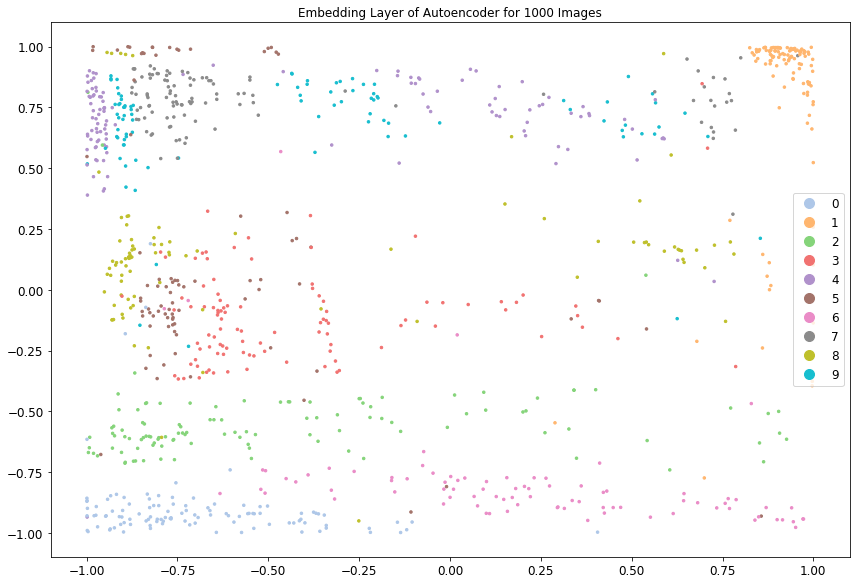

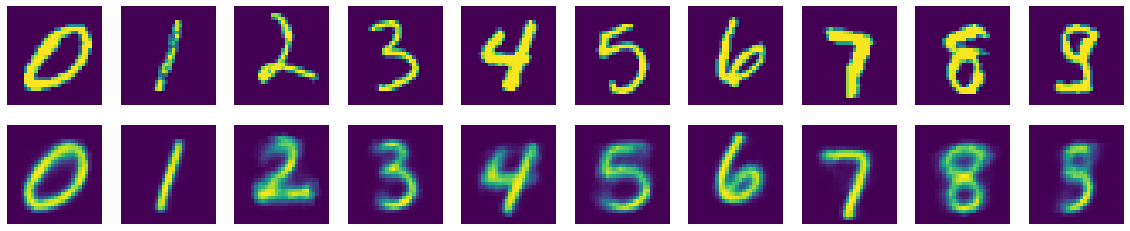

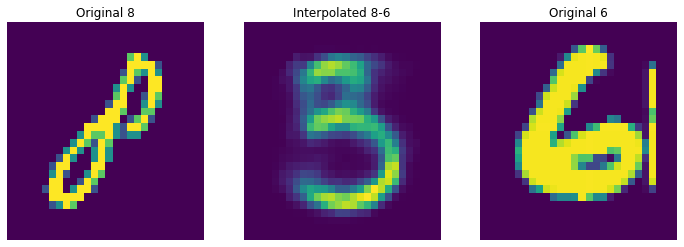

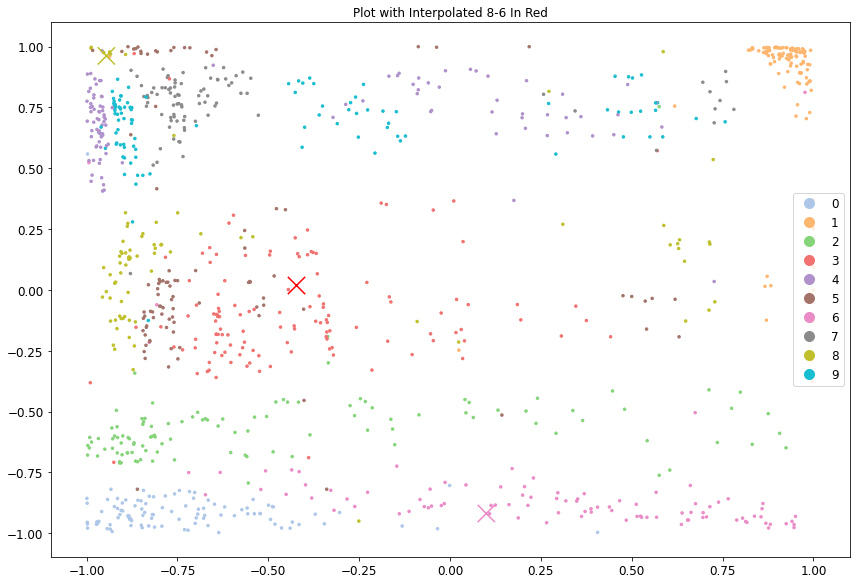

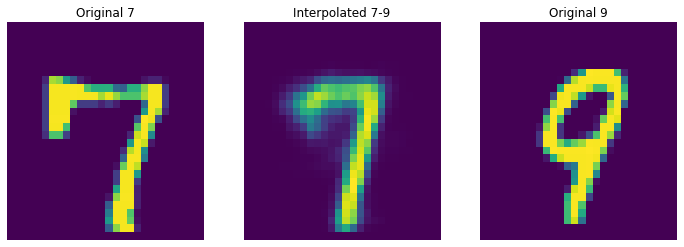

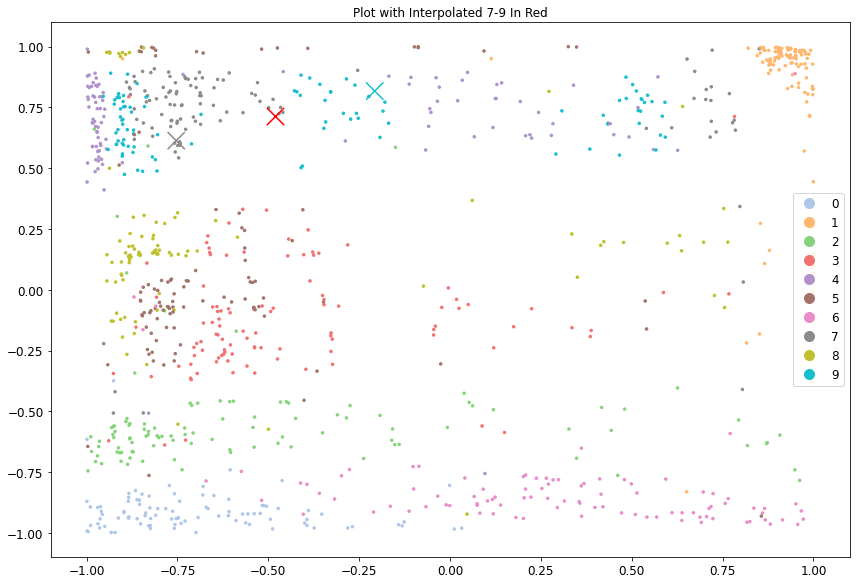

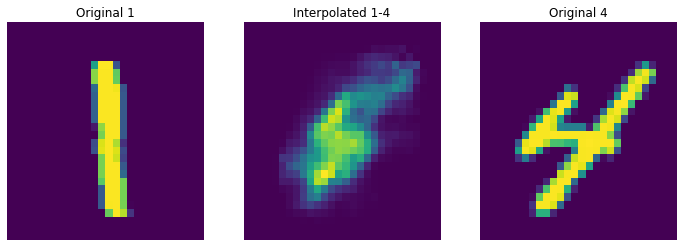

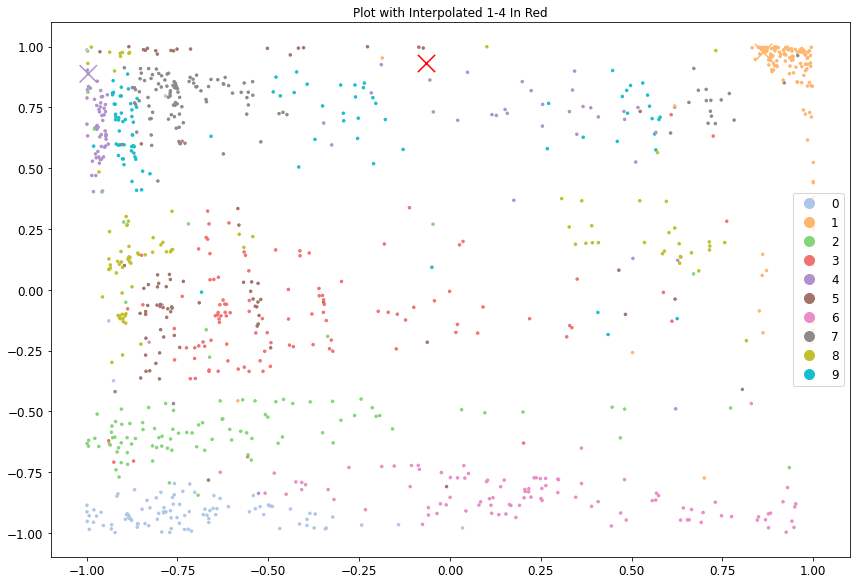

In [ ]:
model = Autoencoder(activation = nn.Tanh())
model.load_state_dict(torch.load('/content/drive/MyDrive/ColabNotebooks/ae_tanh.pt'))
model.eval()

display_1000(model)
display_10(model)

for i in range(3):
  interpolate(model)

In [ ]:
model = Autoencoder()
model = model.to(device)
Adam = torch.optim.Adam(model.parameters(), lr = 1e-3)
loss_fn = torch.nn.MSELoss()

train(model, loss_fn, Adam, train_loader, test_loader)
torch.save(model.state_dict(), '/content/drive/MyDrive/ColabNotebooks/ae_identity.pt')

 EPOCH 5. Progress: 5.0%. 
 Train loss: 0.03961634635925293. Test loss: 0.0399719662964344
 EPOCH 10. Progress: 10.0%. 
 Train loss: 0.036376673728227615. Test loss: 0.037006065249443054
 EPOCH 15. Progress: 15.0%. 
 Train loss: 0.035099174827337265. Test loss: 0.035776104778051376
 EPOCH 20. Progress: 20.0%. 
 Train loss: 0.03458607196807861. Test loss: 0.03539487347006798
 EPOCH 25. Progress: 25.0%. 
 Train loss: 0.034379735589027405. Test loss: 0.035191748291254044
 EPOCH 30. Progress: 30.0%. 
 Train loss: 0.033789992332458496. Test loss: 0.034768685698509216
 EPOCH 35. Progress: 35.0%. 
 Train loss: 0.033441927284002304. Test loss: 0.03448091819882393
 EPOCH 40. Progress: 40.0%. 
 Train loss: 0.032894037663936615. Test loss: 0.03393232822418213
 EPOCH 45. Progress: 45.0%. 
 Train loss: 0.03251643851399422. Test loss: 0.03377606347203255
 EPOCH 50. Progress: 50.0%. 
 Train loss: 0.032349176704883575. Test loss: 0.03374491631984711
 EPOCH 55. Progress: 55.00000000000001%. 
 Train los

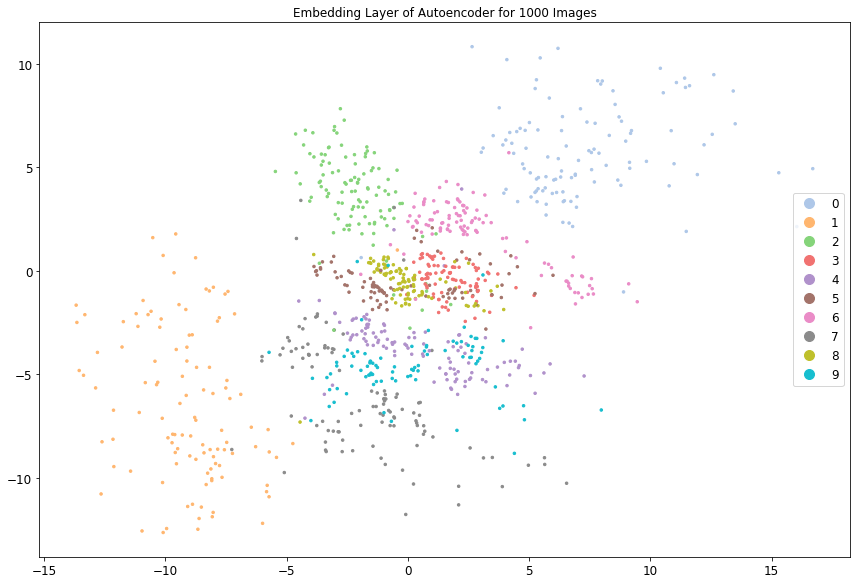

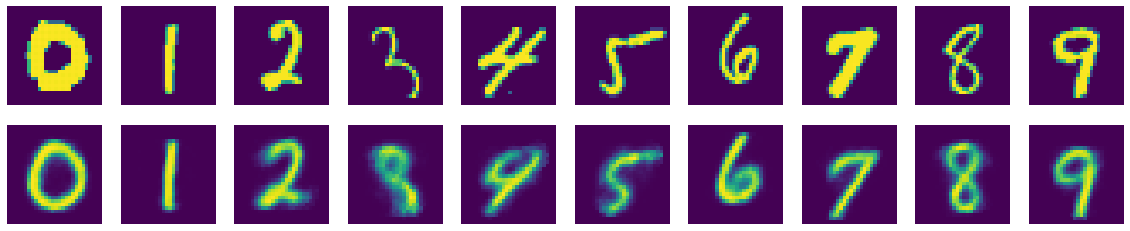

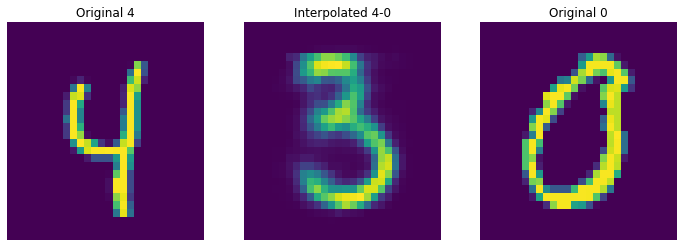

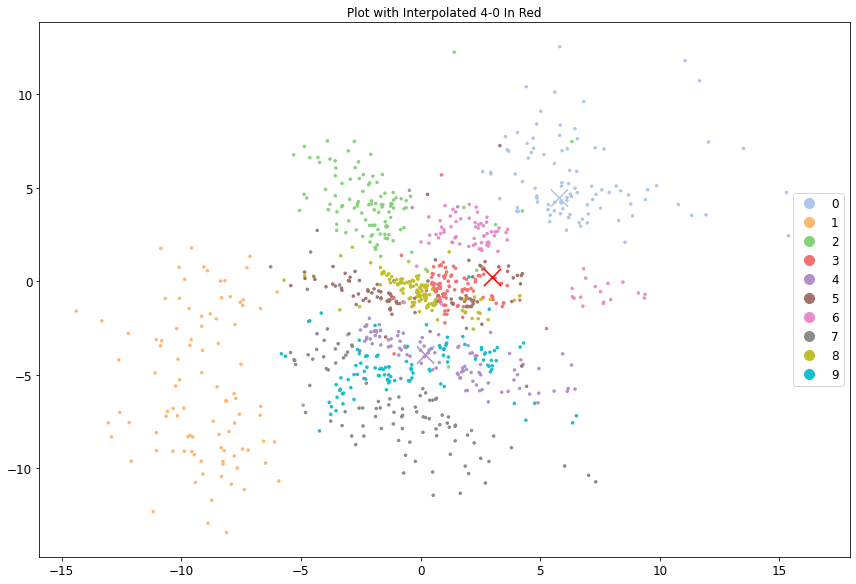

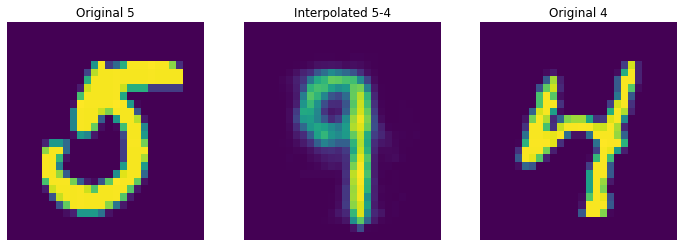

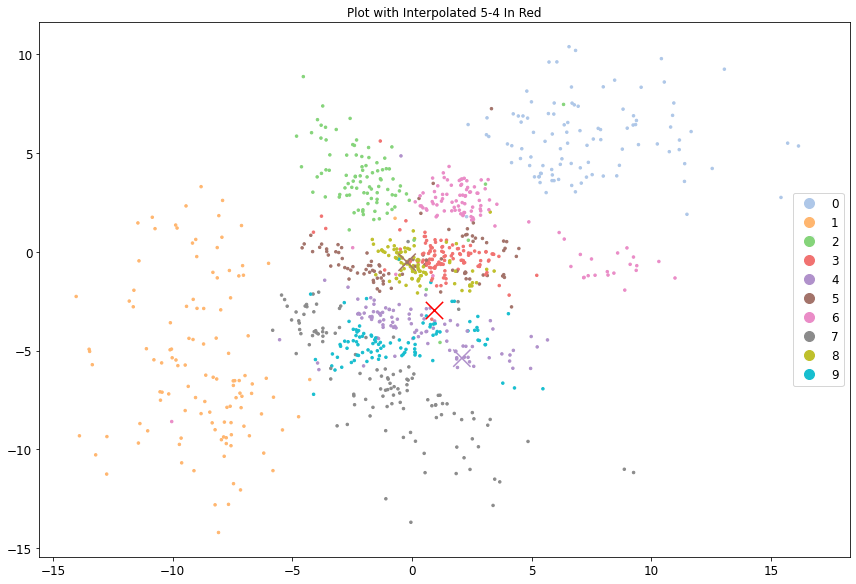

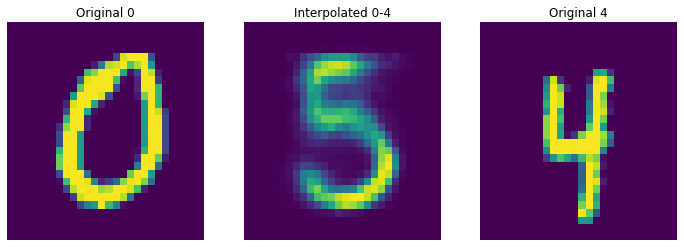

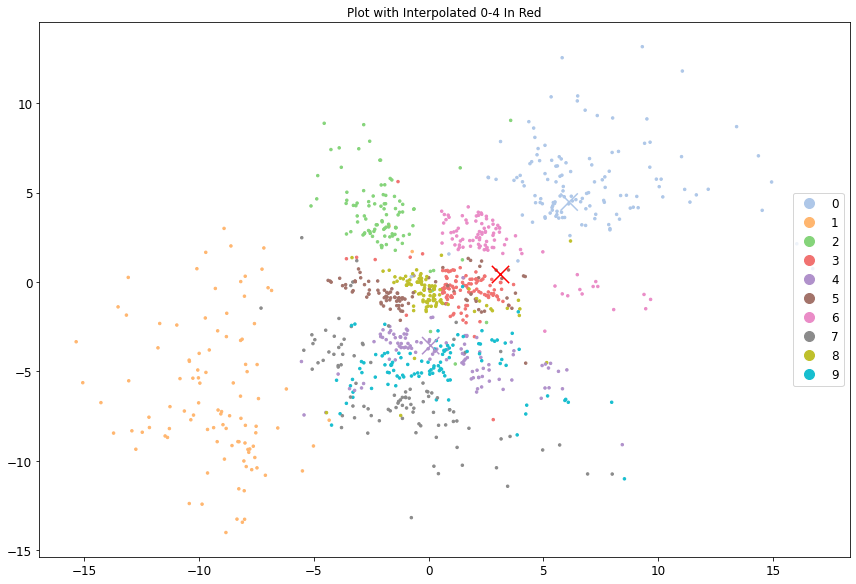

In [ ]:
model = Autoencoder()
model.load_state_dict(torch.load('/content/drive/MyDrive/ColabNotebooks/ae_identity.pt'))
model.eval()

display_1000(model)
display_10(model)

for i in range(3):
  interpolate(model)

**Question 3.1.1:** *Do the colors easily separate, or are they all clumped together? Which numbers are frequently embedded close together, and what does this mean?*

**Answer:** 

**Question 3.1.2:** *How realistic were the images you generated by interpolating between points in the latent space? Can you think of a better way to generate images with an autoencoder?*

**Answer:** 


### 3.2 Biological Data: Retinal Bipolar Dataset

In [ ]:
import pandas
import scprep
from sklearn.model_selection import train_test_split
data = pandas.read_pickle('/content/drive/MyDrive/ColabNotebooks/data/retinal-bipolar-data.pickle')
metadata = pandas.read_pickle('/content/drive/MyDrive/ColabNotebooks/data/retinal-bipolar-metadata.pickle')
data_pca = scprep.reduce.pca(data, 1024)

n_samples = 20000
data_sub, metadata_sub = scprep.select.subsample(data_pca, metadata, n=n_samples, seed=1)
data_sub = np.array(data_sub, dtype=np.float32)
metadata_sub = np.array(metadata_sub)

data_train, data_test, meta_train, meta_test = train_test_split(data_sub, metadata_sub,
                                          test_size=0.2, random_state=1, shuffle=True)

batch_size = 100
rbd_train_loader = torch.utils.data.DataLoader(data_train, batch_size, shuffle = True)
rbd_test_loader = torch.utils.data.DataLoader(data_test, batch_size, shuffle = True)

In [ ]:
def train(model, loss_fn, optimizer, train_loader, test_loader):
    """
    This is a standard training loop, which leaves some parts to be filled in.
    INPUT:
    :param model: an untrained pytorch model
    :param loss_fn: e.g. Cross Entropy loss of Mean Squared Error.
    :param optimizer: the model optimizer, initialized with a learning rate.
    :param training_set: The training data, in a dataloader for easy iteration.
    :param test_loader: The testing data, in a dataloader for easy iteration.
    """
    num_epochs = 100 # obviously, this is too many. I don't know what this author was thinking.
    for epoch in range(num_epochs):
        # loop through each data point in the training set
        for data in train_loader:

            # run the model on the data
            model_input = data.to(device)
            out = model(model_input)

            # Calculate the loss
            loss = loss_fn(out, model_input)

            # Find the gradients of our loss via backpropogation
            loss.backward()

            # Adjust accordingly with the optimizer
            optimizer.step()
            optimizer.zero_grad()

        # Give status reports every 10 epochs
        if (epoch + 1) % 10==0:
            print(f" EPOCH {epoch+1}. Progress: {(epoch+1)/num_epochs*100}%. ")
            print(f" Train loss: {evaluate(model,train_loader)}. Test loss: {evaluate(model,test_loader)}")

def evaluate(model, evaluation_set):
    """
    Evaluates the given model on the given dataset.
    Returns the MSE loss of the output and original input
    """
    total_loss = 0
    total_samples = 0

    with torch.no_grad():
        for data in evaluation_set:

            model_input = data.to(device)
            out = model(model_input)

            total_samples += data.shape[0]
            total_loss += loss_fn(out, model_input)*data.shape[0]

    mean_loss = 1.0 * total_loss / total_samples
    return mean_loss
            
model = Autoencoder(sizes=[1024, 512, 256, 128, 2], post_activation = nn.Identity())
model = model.to(device)
Adam = torch.optim.Adam(model.parameters(), lr = 1e-3)
loss_fn = torch.nn.MSELoss()

train(model, loss_fn, Adam, rbd_train_loader, rbd_test_loader)
torch.save(model.state_dict(), '/content/drive/MyDrive/ColabNotebooks/ae_bipolar.pt')

 EPOCH 10. Progress: 10.0%. 
 Train loss: 2.9391303062438965. Test loss: 2.9613189697265625
 EPOCH 20. Progress: 20.0%. 
 Train loss: 2.9032368659973145. Test loss: 2.932337522506714
 EPOCH 30. Progress: 30.0%. 
 Train loss: 2.8874735832214355. Test loss: 2.927443027496338
 EPOCH 40. Progress: 40.0%. 
 Train loss: 2.875368595123291. Test loss: 2.9199588298797607
 EPOCH 50. Progress: 50.0%. 
 Train loss: 2.8675856590270996. Test loss: 2.9194681644439697
 EPOCH 60. Progress: 60.0%. 
 Train loss: 2.8624868392944336. Test loss: 2.919577121734619
 EPOCH 70. Progress: 70.0%. 
 Train loss: 2.868588924407959. Test loss: 2.9246015548706055
 EPOCH 80. Progress: 80.0%. 
 Train loss: 2.8567006587982178. Test loss: 2.922710657119751
 EPOCH 90. Progress: 90.0%. 
 Train loss: 2.8551230430603027. Test loss: 2.9256434440612793
 EPOCH 100. Progress: 100.0%. 
 Train loss: 2.8623411655426025. Test loss: 2.929213762283325


Text(0.5, 1.0, 'Embedding Layer of Retinal Bipolar Autoencoder for 2000 Cases')

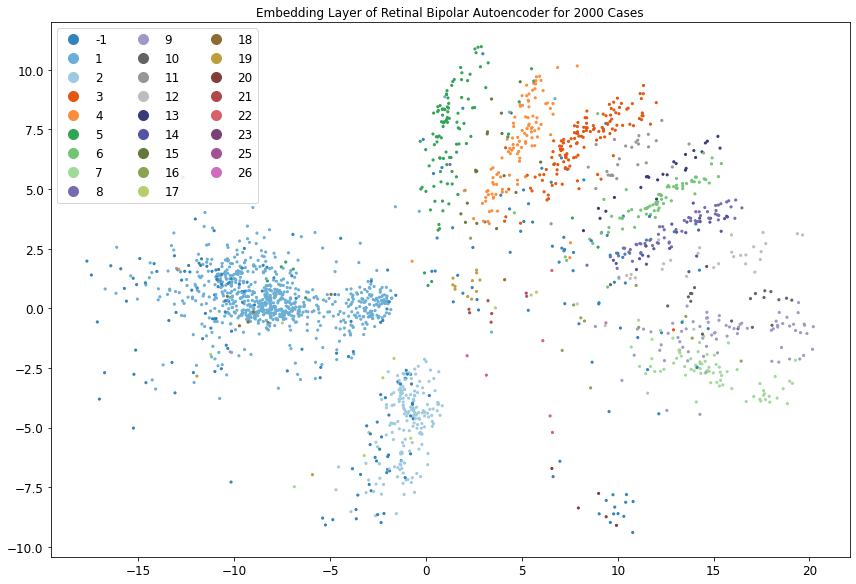

In [ ]:
# Modification of display_1000 code above
model = Autoencoder(sizes=[1024, 512, 256, 128, 2], post_activation = nn.Identity())
model.load_state_dict(torch.load('/content/drive/MyDrive/ColabNotebooks/ae_bipolar.pt'))
model.eval()

all_outs = np.empty((0, 2))
all_targets = []
total_displayed = 0
for i in range(20):
  model_input = torch.tensor(data_test[100*i:100*(i+1), :])
  targets = meta_test[100*i:100*(i+1), 0]
  out = model.encode(model_input).detach().numpy()

  all_outs = np.vstack((all_outs, out))
  all_targets.extend(list(map(int, targets)))
  
  total_displayed += targets.shape[0]

ax = scprep.plot.scatter2d(all_outs, c = all_targets, legend = True, discrete=True,
                      figsize=(12, 8), cmap=scprep.plot.colors.tab30())
ax.set_title(f"Embedding Layer of Retinal Bipolar Autoencoder for {total_displayed} Cases")

**Question 3.2.1:** *How many clusters are visible in the embedding? Do they correspond to the cluster labels?*

**Answer:** 


## 4 Generative Models

### 4.1 The Variational Autoencoder

In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks
!python code/vae.py --epochs 50 --log-interval 250

/content/drive/MyDrive/ColabNotebooks
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Train Epoch: 1 [0/60000 (0%)]	Loss: 185.038010
Train Epoch: 1 [32000/60000 (53%)]	Loss: 40.093014
====> Epoch: 1 Average loss: 45.1896
====> Test set loss: 36.3585
Train Epoch: 2 [0/60000 (0%)]	Loss: 34.148956
Train Epoch: 2 [32000/60000 (53%)]	Loss: 34.914124
====> Epoch: 2 Average loss: 34.9674
====> Test set loss: 33.4418
Train Epoch: 3 [0/60000 (0%)]	Loss: 33.405102
Train Epoch: 3 [32000/60000 (53%)]	Loss: 33.673500
====> Epoch: 3 Average loss: 33.1410
====> Test set loss: 32.2883
Train Epoch: 4 [0/60000 (0%)]	Loss: 32.802277
Train Epoch: 4 [32000/60000 (53%)]	Loss: 31.808475
====> Epoch: 4 Average loss: 32.2361
====> Test set loss: 31.5511
Train Epoch: 5 [0/60000 (0%)]	Loss: 32.284492
Train Epoch: 5 [32000/60000 (53%)]	Loss: 30.518394
====> Epoch

In [28]:
model = torch.load('/content/drive/MyDrive/ColabNotebooks/vae_2.pt')
model = model.to("cpu")

display_1000(model, out_size = 20)
display_10(model)

for i in range(3):
    interpolate(model)


RuntimeError: ignored

**Question 4.1.1:** *How does the VAE’s latent space compare to the latent space of your previous autoencoder? Do the generated images have more clarity? Is this most noticeable between or within classes?*

**Answer:** Not really any clearer (because noise) although this model appears to do better at discerning the various digits compared to AE.

**Question 4.1.2:** *In what situations would a VAE be more useful than a vanilla autoencoder, and when would you prefer a vanilla autoencoder to a VAE?*

**Answer:** VAE useful to create new instances (which autoencoders are not as good at). For example, we can't simply draw a random embedding from the AE latent space because we have no restrictions on this latent space. On the other hand, VAE is easier to draw from to create new samples

**Question 4.1.3:** *The distance between embeddings in your first autoencoder provided some measure of the similarity between digits. To what extent is this preserved, or improved, by the VAE?*

**Answer:** 


### 4.2 GANs

In [ ]:
# nz=100
!python code/GAN.py

Epoch 0: mean discriminator loss 0.3963082432746887 // mean generator loss 1.4960644245147705
Epoch 1: mean discriminator loss 0.31417977809906006 // mean generator loss 1.6973217725753784
Epoch 2: mean discriminator loss 0.30743810534477234 // mean generator loss 1.6736215353012085
Epoch 3: mean discriminator loss 0.29308784008026123 // mean generator loss 1.6119202375411987
Epoch 4: mean discriminator loss 0.2723456919193268 // mean generator loss 1.5827842950820923
Epoch 5: mean discriminator loss 0.302641361951828 // mean generator loss 1.4504163265228271
Epoch 6: mean discriminator loss 0.31861451268196106 // mean generator loss 1.3450078964233398
Epoch 7: mean discriminator loss 0.3265911340713501 // mean generator loss 1.3358896970748901
Epoch 8: mean discriminator loss 0.324595183134079 // mean generator loss 1.3386613130569458
Epoch 9: mean discriminator loss 0.31453433632850647 // mean generator loss 1.3653758764266968
Epoch 10: mean discriminator loss 0.30280208587646484 // 

In [ ]:
# nz=25
!python code/GAN.py

Epoch 0: mean discriminator loss 0.4289831519126892 // mean generator loss 1.4224261045455933
Epoch 1: mean discriminator loss 0.38948744535446167 // mean generator loss 1.4830061197280884
Epoch 2: mean discriminator loss 0.33901429176330566 // mean generator loss 1.4941326379776
Epoch 3: mean discriminator loss 0.30918049812316895 // mean generator loss 1.5174927711486816
Epoch 4: mean discriminator loss 0.3451070189476013 // mean generator loss 1.3223142623901367
Epoch 5: mean discriminator loss 0.35682201385498047 // mean generator loss 1.2649003267288208
Epoch 6: mean discriminator loss 0.34560438990592957 // mean generator loss 1.2531505823135376
Epoch 7: mean discriminator loss 0.34246331453323364 // mean generator loss 1.2490540742874146
Epoch 8: mean discriminator loss 0.33268243074417114 // mean generator loss 1.2941964864730835
Epoch 9: mean discriminator loss 0.32107803225517273 // mean generator loss 1.3215296268463135
Epoch 10: mean discriminator loss 0.3104863464832306 //

Counts of 1000 Classififed Numbers: {0: 655, 1: 2, 2: 7, 3: 150, 4: 1, 5: 61, 6: 15, 7: 4, 8: 99, 9: 6}


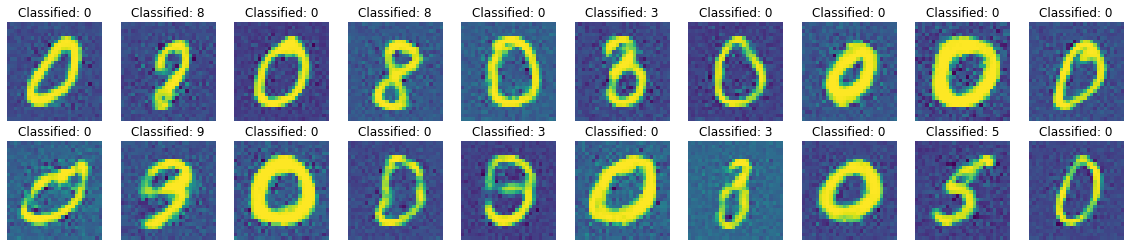

In [27]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz # the dimension of the random noise used to seed the Generator
        self.main = nn.Sequential( # nn.sequential is a handy way of combining multiple layers.
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Generator with nz=100
generator = torch.load('/content/drive/MyDrive/ColabNotebooks/new_gan.pt')

# Best classifier from part 2 (ReLU non-linearity)
classifier = FeedForwardNet(pre_activation = nn.ReLU())
classifier.load_state_dict(torch.load('/content/drive/MyDrive/ColabNotebooks/ff_relu.pt', map_location=torch.device('cpu')))

torch.manual_seed(1)
counts = torch.zeros(10)
for i in range(10):
    fake_data = generator(torch.randn(100, 100)).reshape(-1, 784)
    labels = classifier(fake_data).argmax(dim=1)
    out, count = torch.unique(labels, sorted=True, return_counts=True)
    for i, label in enumerate(out):
        counts[label] += count[i]

count_dict = {}
for i in range(10):
    count_dict[i] = int(counts[i])
print("Counts of 1000 Classififed Numbers:", count_dict)

# Modified from display_10 function above
torch.manual_seed(453)
fake_data = generator(torch.randn(20, 100)).reshape(-1, 784)
reshaped = fake_data.reshape(-1, 28, 28).detach().numpy()
labels = classifier(fake_data).argmax(dim=1)

plt.figure(figsize=(20, 4))
for i, label in enumerate(labels):
    ax = plt.subplot(2, 10, i + 1)
    ax.title.set_text(f"Classified: {label}")
    plt.axis('off')
    plt.imshow(reshaped[i, :, :], aspect='auto')
  
plt.show()

**Question 4.2.1:** *Which generates more realistic images: your GAN, or your VAE? Why do you think this
is?*

**Answer:** 

**Question 4.2.2:** *Does your GAN appear to generate all digits in equal number, or has it specialized in a smaller number of digits? If so, why might this be?*

**Answer:** Not equal. Lots of zeros (kind of makes sense since a lot of numbers, especially those with curves, probably look quite similar to zero). Mode collapse. If we wanted equal distribution, probably want a conditional GAN

not many values withs traight lines


## 5 Information Theory

### 5.1 Simple Distribution

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KernelDensity
from scipy.stats import entropy
import cv2

samples_unif = np.random.uniform(low = -0.5, high = 0.5, size = (1000, 3))
samples_normal = np.random.multivariate_normal((0, 0, 0), np.identity(3), 1000)

space = np.linspace(-1, 1, 10)
random_space_samples = np.dstack(np.meshgrid(space, space, space)).reshape(-1, 3)
shifted_space_samples = random_space_samples - random_space_samples.min()

In [ ]:
begin = time.perf_counter()

kde = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(samples_unif)
probs_unif = np.exp(kde.score_samples(random_space_samples))

kde = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(samples_normal)
probs_normal = np.exp(kde.score_samples(random_space_samples))

dist = entropy(probs_unif, probs_normal)

print(f"KL Divergence: dist = {dist} && time = {time.perf_counter() - begin}")

KL Divergence: dist = 0.19722212574557946 && time = 0.20458535299997038


In [ ]:
# !pip install pyemd
# from pyemd import emd
# from scipy.spatial.distance import cdist
def img_to_sig(probs, coords):
    return np.float32(np.hstack((probs[:, np.newaxis], coords)))

begin = time.perf_counter()

kde = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(samples_unif)
probs_unif = np.exp(kde.score_samples(random_space_samples))
sig_unif = img_to_sig(probs_unif, random_space_samples)

kde = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(samples_normal)
probs_normal = np.exp(kde.score_samples(random_space_samples))
sig_normal = img_to_sig(probs_normal, random_space_samples)

# distance_matrix = cdist(random_space_samples, random_space_samples)
# dist = emd(probs_unif, probs_normal, distance_matrix)
dist, _, flow = cv2.EMD(sig_unif, sig_normal, cv2.DIST_L2)

print(f"EMD: dist = {dist} && time = {time.perf_counter() - begin}")

EMD: dist = 0.008886870928108692 && time = 3.638542768000093


In [ ]:
begin = time.perf_counter()

dist = mmd(samples_unif, samples_normal, kernel_fn = kernel)

print(f"MMD: dist = {dist} && time = {time.perf_counter() - begin}")

new
MMD: dist = 0.3211406608401066 && time = 0.1017796600000338


**Question 5.1.1:** *Based on the above measures alone, which divergence seems most accurate?*

**Answer:** 


### 5.2 MNIST Sample Distributions

In [ ]:
#TODO: reduce dimensions with PCA (to 3 or 8? dimensions)

### 5.3 The GAN Distribution

**Question 5.3.1:** *Which divergence or distance showed the greatest discrepancy between the comparison between real MNIST data and the comparison with the GAN?*

**Answer:** 

**Question 5.3.2:** *Which of these information measures would you recommend for judging a GAN’s output? Why?*

**Answer:** 

**Question 5.3.3:** *How do the runtimes of these measures compare?*

**Answer:** 
